# Car Price Prediction


## Exploratory Data Analysis ( EDA )
  
  Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows us to get a better feel of our data and find useful patterns in it.
   
   
### This EDA contains the following:

   - The variation of selling price based on brand
   - The variation of selling price based on age
   - The count difference between the Petrol, Diesel, CNG
   - How many are Individual and Dealer cars?
   - How many are automatic and manual cars

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# using pandas dataframe to read the data
df=pd.read_csv('Data/Train/Raw/train.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Royal Enfield Classic 500,2009,0.90,1.75,40000,Petrol,Individual,Manual,0
1,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
2,xcent,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0
3,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
4,dzire,2014,5.50,8.06,45000,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
205,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
206,innova,2015,12.50,13.46,38000,Diesel,Dealer,Manual,0
207,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
208,verna,2013,6.15,9.40,45000,Diesel,Dealer,Manual,0


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Kms_Driven     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Seller_Type    210 non-null    object 
 7   Transmission   210 non-null    object 
 8   Owner          210 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 14.9+ KB


In [5]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,210,210.00000,210.000000,210.000000,210.000000,210,210,210,210.000000
unique,80,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,18,NaN,NaN,NaN,NaN,165,137,180,NaN
mean,NaN,2013.60000,4.828857,7.942795,34616.880952,NaN,NaN,NaN,0.047619
std,NaN,2.96099,5.420704,9.518319,27778.841104,NaN,NaN,NaN,0.272537
min,NaN,2003.00000,0.100000,0.470000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.00000,1.050000,1.470000,14473.750000,NaN,NaN,NaN,0.000000
50%,NaN,2014.00000,3.500000,6.010000,30000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.00000,6.075000,9.930000,46875.000000,NaN,NaN,NaN,0.000000


In [6]:
df.shape

(210, 9)

In [7]:
df.nunique()

Car_Name          80
Year              15
Selling_Price    127
Present_Price    118
Kms_Driven       158
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
len(df['Car_Name'].unique())

# We have over 80 unique car names, so we will extract only the car brand from the car names

80

In [10]:
df["Brand_Name"]=df["Car_Name"].str.split(" ",expand=True)[0]

In [11]:
df["Brand_Name"].value_counts()

Brand_Name
Bajaj       19
city        18
Royal       14
corolla     11
Honda       11
fortuner    10
verna       10
etios        7
ciaz         7
Hero         7
i20          7
grand        7
brio         7
ertiga       6
TVS          6
Yamaha       6
innova       6
eon          5
alto         4
i10          4
swift        4
jazz         4
wagon        3
dzire        3
elantra      2
sx4          2
ritz         2
creta        2
xcent        2
amaze        2
KTM          2
800          1
Activa       1
Suzuki       1
omni         1
baleno       1
land         1
camry        1
UM           1
Mahindra     1
Hyosung      1
Name: count, dtype: int64

In [12]:
# we consider the "Brand_Name" instead of "Car_Name"

df.drop(['Car_Name'], axis = 1, inplace = True)

In [13]:
df["Year"].value_counts()

Year
2015    41
2016    33
2017    27
2013    27
2014    25
2012    17
2011    12
2010    10
2009     5
2006     4
2005     3
2003     2
2008     2
2004     1
2007     1
Name: count, dtype: int64

In [14]:
df['Age'] = 2023 - df['Year']

In [15]:
# we consider the "age" instead of "year"

df.drop(['Year'], axis = 1, inplace = True)

In [16]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name,Age
0,0.90,1.75,40000,Petrol,Individual,Manual,0,Royal,14
1,0.48,0.51,4300,Petrol,Individual,Automatic,0,Honda,6
2,4.40,7.13,34000,Petrol,Dealer,Manual,0,xcent,9
3,0.35,2.28,127000,Petrol,Individual,Manual,0,800,20
4,5.50,8.06,45000,Diesel,Dealer,Manual,0,dzire,9
...,...,...,...,...,...,...,...,...,...
205,1.35,3.45,16500,Petrol,Individual,Manual,1,Hyosung,9
206,12.50,13.46,38000,Diesel,Dealer,Manual,0,innova,8
207,7.75,10.79,43000,Diesel,Dealer,Manual,0,ertiga,7
208,6.15,9.40,45000,Diesel,Dealer,Manual,0,verna,10


In [17]:
df['Kms_Driven'].describe().round()

count       210.0
mean      34617.0
std       27779.0
min         500.0
25%       14474.0
50%       30000.0
75%       46875.0
max      197176.0
Name: Kms_Driven, dtype: float64

## Finding Outlier

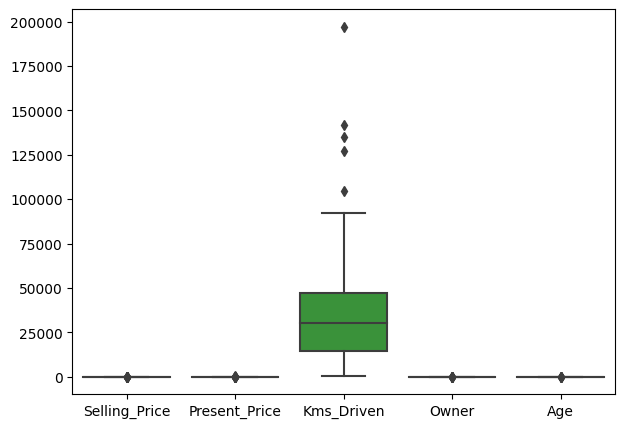

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(df)
plt.show()

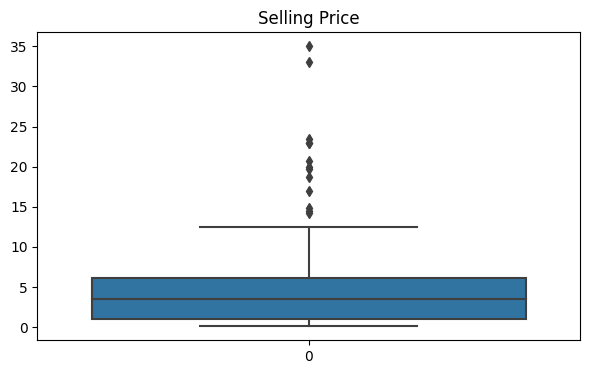

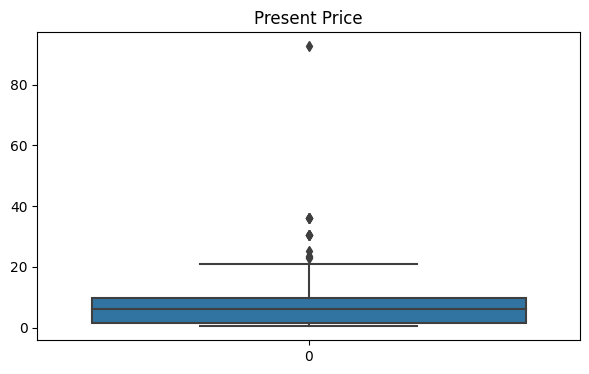

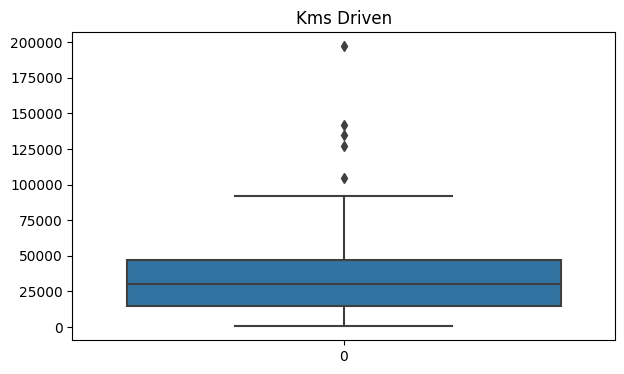

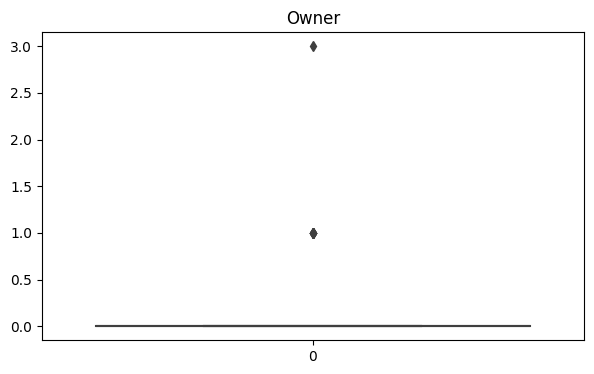

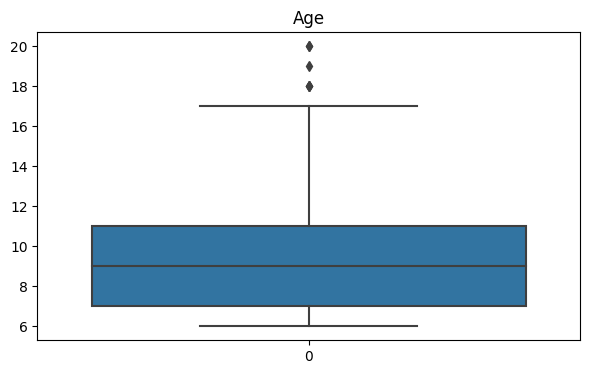

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(df['Selling_Price'])
plt.title('Selling Price')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(df['Present_Price'])
plt.title('Present Price')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(df['Kms_Driven'])
plt.title('Kms Driven')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(df['Owner'])
plt.title('Owner')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(df['Age'])
plt.title('Age')
plt.show()

In [20]:
#handling outlier in Selling_Price

q1=df['Selling_Price'].quantile(0.25)
q3=df['Selling_Price'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Selling_Price']=df.Selling_Price[(df.Selling_Price>lower_range)&(df.Selling_Price<upper_range)]
df['Selling_Price']

0      0.90
1      0.48
2      4.40
3      0.35
4      5.50
       ... 
205    1.35
206     NaN
207    7.75
208    6.15
209    7.05
Name: Selling_Price, Length: 210, dtype: float64

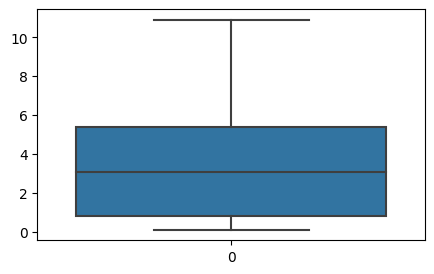

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Selling_Price'])
plt.show()

In [22]:
#handling outlier in Present_Price

q1=df['Present_Price'].quantile(0.25)
q3=df['Present_Price'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Present_Price']=df.Present_Price[(df.Present_Price>lower_range)&(df.Present_Price<upper_range)]
df['Present_Price']

0       1.75
1       0.51
2       7.13
3       2.28
4       8.06
       ...  
205     3.45
206    13.46
207    10.79
208     9.40
209      NaN
Name: Present_Price, Length: 210, dtype: float64

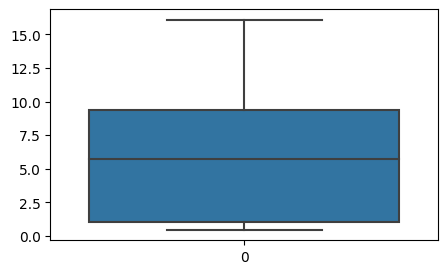

In [23]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Present_Price'])
plt.show()

In [24]:
#handling outlier in Kms_Driven

q1=df['Kms_Driven'].quantile(0.25)
q3=df['Kms_Driven'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Kms_Driven']=df.Kms_Driven[(df.Kms_Driven>lower_range)&(df.Kms_Driven<upper_range)]
df['Kms_Driven']

0      40000.0
1       4300.0
2      34000.0
3          NaN
4      45000.0
        ...   
205    16500.0
206    38000.0
207    43000.0
208    45000.0
209    45000.0
Name: Kms_Driven, Length: 210, dtype: float64

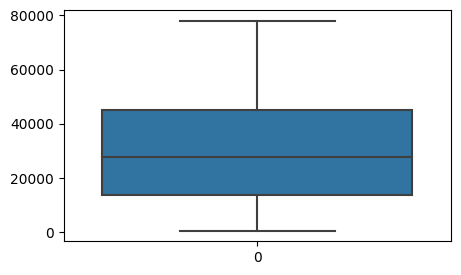

In [25]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Kms_Driven'])
plt.show()

In [26]:
#handling outlier in Age

q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR
df['Age']=df.Age[(df.Age>lower_range)&(df.Age<upper_range)]
df['Age']

0      14.0
1       6.0
2       9.0
3       NaN
4       9.0
       ... 
205     9.0
206     8.0
207     7.0
208    10.0
209    10.0
Name: Age, Length: 210, dtype: float64

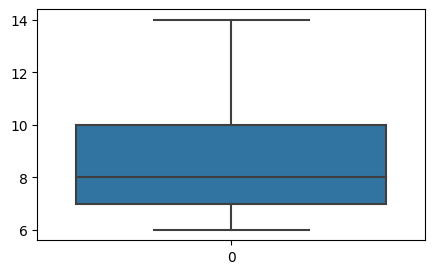

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Age'])
plt.show()

## Exploratory Data Analysis ( EDA )

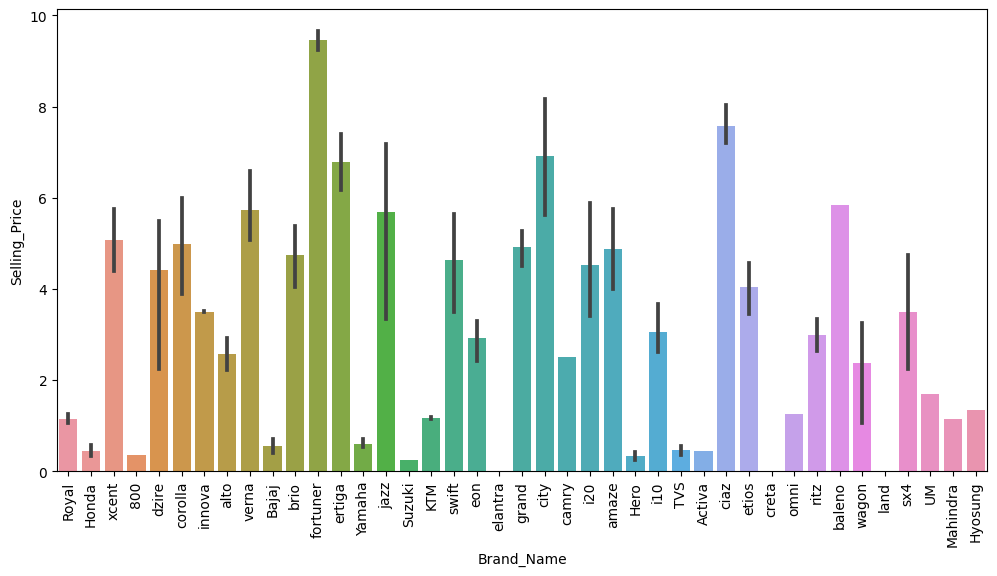

In [28]:
# the variation of selling price based on brand
plt.figure(figsize=(12,6))
sns.barplot(x="Brand_Name",y="Selling_Price",data=df)
plt.xticks(rotation = 90)
plt.show()

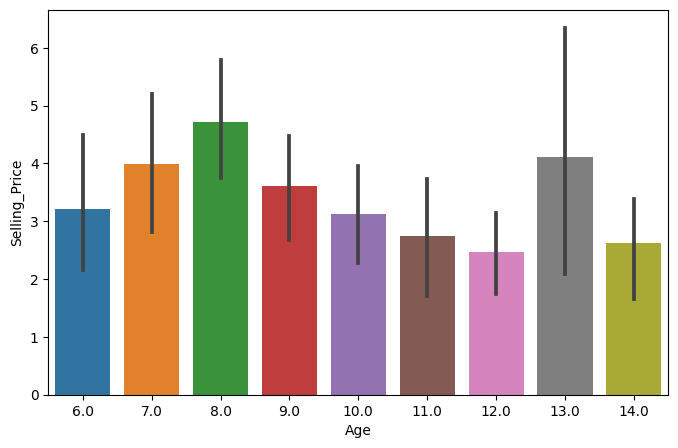

In [29]:
# The variation of selling price based on age
plt.figure(figsize=(8,5))
sns.barplot(x="Age",y="Selling_Price",data=df)
plt.show()

Fuel_Type
Petrol    165
Diesel     44
CNG         1
Name: count, dtype: int64


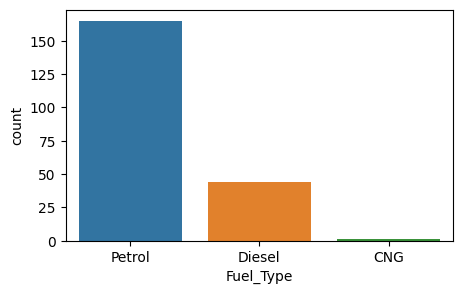

In [30]:
# The count difference between the Petrol, Diesel, CNG
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Fuel_Type",data=df)
plt.show()

Seller_Type
Dealer        137
Individual     73
Name: count, dtype: int64


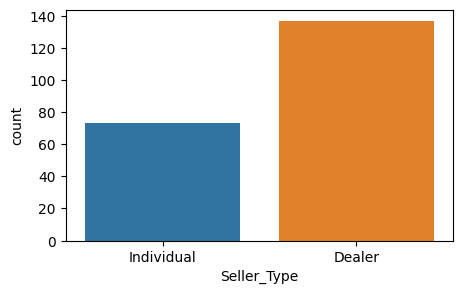

In [31]:
# How many are Individual and Dealer cars?
print(df["Seller_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Seller_Type",data=df)
plt.show()

Transmission
Manual       180
Automatic     30
Name: count, dtype: int64


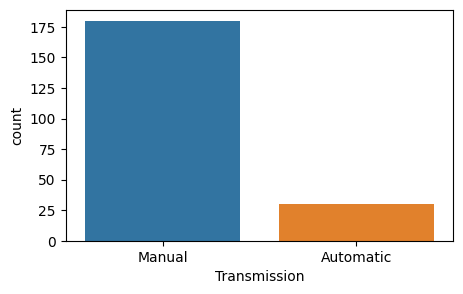

In [32]:
# How many are automatic and manual cars?
print(df["Transmission"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Transmission",data=df)
plt.show()